<a href="https://colab.research.google.com/github/RobelDawit/code-store/blob/main/Training_pipeline_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project

3 classification probelms

1. Person
2. Car
3. Traffic Light

Features

Object-detection -> main goal is to identify every object in the image and crop that part not to classify
classification part is the our part.

# Feature Engineering - Preprocessing
Crop the image on annotation

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

from google.colab import drive
drive.mount('/content/drive')

def load_annotations(annotation_file):
    with open(annotation_file, 'r') as f:
        return json.load(f)

#Change this path accoring to yours
img_dir = '/content/drive/My Drive/sample_car_traffic_light'
img_path = '/content/drive/My Drive//sample_car_traffic_light/'
anno_path = '/content/drive/My Drive//sample_car_traffic_light/'

images = []

for file in os.listdir(img_dir):
    if file.endswith('.png'):
        images.append(file.replace('.png', ''))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
len(images)

1614

In [4]:
import json

# Read the JSON file
with open('/content/drive/My Drive/sample_car_traffic_light/aachen_000010_000019_gtFine_polygons.json', 'r') as json_file:
    data = json.load(json_file)

# Extract labels from objects
labels = [obj['label'] for obj in data['objects']]

# Print or use the extracted labels
print(labels)


['sky', 'sky', 'building', 'road', 'car', 'sidewalk', 'sidewalk', 'ground', 'static', 'car', 'vegetation', 'car', 'car', 'sidewalk', 'car', 'vegetation', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'bicycle', 'fence', 'bicyclegroup', 'traffic sign', 'traffic sign', 'traffic sign', 'pole', 'traffic light', 'traffic light', 'car', 'traffic light', 'traffic light', 'traffic light', 'traffic light', 'static', 'traffic light', 'traffic light', 'traffic light', 'sidewalk', 'traffic light', 'traffic light', 'terrain', 'traffic light', 'vegetation', 'person', 'static', 'static', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'static', 'static', 'static', 'static', 'traffic light', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'traffic sign', 'static', 'static', 'traffic light', 'static', 'car', 'traffic sign', 'static', 'static', 'traffic sign', 'person', 'person', 'static', 'traffic sign', 'car', 'building', 'pole', 'pole', 'static', 'traff

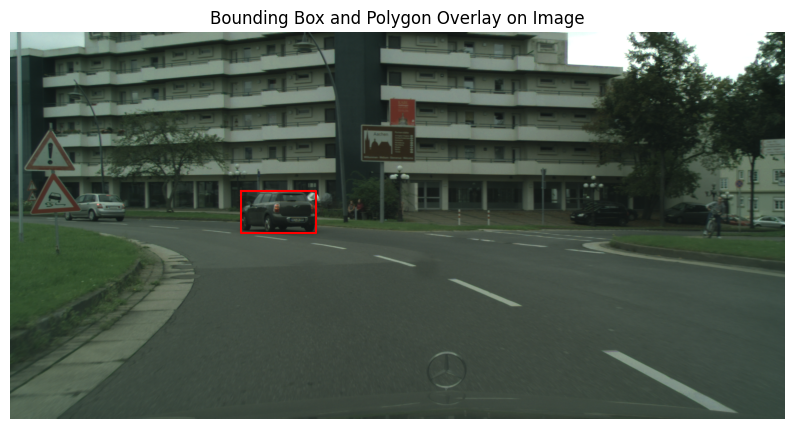

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import json

# Read the JSON data
with open('/content/drive/My Drive/sample_car_traffic_light/aachen_000000_000019_gtFine_polygons.json', 'r') as json_file:
    data = json.load(json_file)

# Load the image
image_path = '/content/drive/My Drive/sample_car_traffic_light/aachen_000000_000019_leftImg8bit.png'  # Replace 'your_image.jpg' with your image file path
image = Image.open(image_path)

# Extract polygon coordinates
polygon_coords = data['objects'][2]['polygon']  # Assuming there's only one object in the list

# Separate x and y coordinates
x_coords, y_coords = zip(*polygon_coords)


# Calculate bounding box coordinates
x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)


# Plot the image
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis('off')  # Turn off axes

# # Plot the polygon on top of the image
# plt.plot(x_coords, y_coords, color='blue', marker='o')
# plt.fill(x_coords, y_coords, color='blue', alpha=0.3)  # Fill the polygon

# Draw the bounding box
bbox_coords = [(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min), (x_min, y_min)]
bbox_x, bbox_y = zip(*bbox_coords)
plt.plot(bbox_x, bbox_y, color='red')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Bounding Box and Polygon Overlay on Image')

# Show the plot with the image, polygon, and bounding box
plt.show()


In [6]:
# Function to calculate the area of a bounding box
def calculate_bbox_area(bbox_coords):
    x_min, y_min, x_max, y_max = bbox_coords
    width = x_max - x_min
    height = y_max - y_min
    area = width * height
    return area

9870
13209
130275
2016
29274
27573
4400


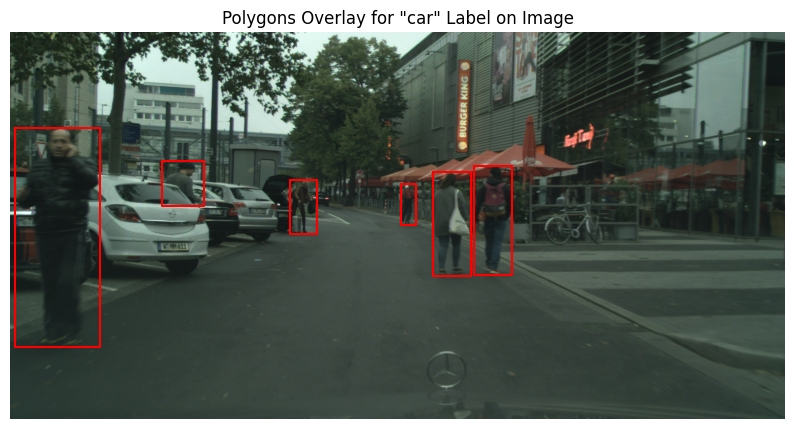

In [7]:
#Print a sample image
#for car dataset
i = 10
img = img_path + images[i] + '.png'
annotate = anno_path + images[i][:-11] + 'gtFine_polygons.json'
imgGray = cv.imread(img)

annotations = load_annotations(annotate)

imgGray = cv.cvtColor(imgGray, cv.IMREAD_GRAYSCALE)

car_objects = [obj for obj in annotations['objects'] if obj['label'] == 'person']

image = Image.open(img)

# Plot the image
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis('off')  # Turn off axes
count = 1
box_area = []
# Plot polygons for each car object
for car_obj in car_objects:

    polygon_coords = car_obj['polygon']
    x_coords, y_coords = zip(*polygon_coords)

    # Calculate bounding box coordinates
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)

    bbox_coords = [(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min), (x_min, y_min)]

    bbox_area = calculate_bbox_area([x_min, y_min, x_max, y_max])
    bbox_x, bbox_y = zip(*bbox_coords)
    print(bbox_area)
    if (bbox_area > 4000) and (bbox_area not in box_area):
        plt.plot(bbox_x, bbox_y, color='red')
        box_area.append(bbox_area)
        count += 1

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Polygons Overlay for "car" Label on Image')

# Show the plot with the image and polygons
plt.show()


In [8]:
# #Print a sample image
# # For pedestrian dataset only
# i = 0
# img = img_path + images[i] + '.png'
# annotate = anno_path + images[i] + '.json'
# imgGray = cv.imread(img)

# annotations = load_annotations(annotate)

# imgGray = cv.cvtColor(imgGray, cv.IMREAD_GRAYSCALE)

# for annotation in annotations['children']:
#     x0, y0, x1, y1 = annotation['x0'], annotation['y0'], annotation['x1'], annotation['y1']
#     identity = annotation['identity']
#     area = (x1 - x0) * (y1 - y0)
#     if (identity == 'pedestrian') and (area>13000):
#         cv.rectangle(imgGray, (x0, y0), (x1, y1), (0, 255, 0), 2)  # Draw a green rectangle
#         print(area)
#         cv.putText(imgGray, identity, (x0, y0 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# plt.imshow(imgGray)
# plt.axis('off')  # Turn off axis numbers and ticks
# plt.show()
# print("Shape = ", imgGray.shape)


In [9]:
def cropImage(images):
    image_name = []
    labels = []
    xmin = []
    xmax = []
    ymin = []
    ymax = []
    paths = []

    for i in range(len(images)):
        img = img_path + images[i] + '.png'
        annotate = anno_path + images[i][:-11] + 'gtFine_polygons.json'

        imgGraypath = cv.imread(img)
        imgGray = cv.cvtColor(imgGraypath, cv.COLOR_BGR2GRAY)

        annotations = load_annotations(annotate)#load_annotations('zuerich_00000.json') # This needs to be in an element in a list to loop through

        car_objects = [obj for obj in annotations['objects'] if obj['label'] == 'car']

        count = 1
        box_area = []

        for car_obj in car_objects:

            polygon_coords = car_obj['polygon']
            x_coords, y_coords = zip(*polygon_coords)

            # Calculate bounding box coordinates
            x_min, x_max = min(x_coords), max(x_coords)
            y_min, y_max = min(y_coords), max(y_coords)

            bbox_coords = [(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min), (x_min, y_min)]

            bbox_area = calculate_bbox_area([x_min, y_min, x_max, y_max])
            bbox_x, bbox_y = zip(*bbox_coords)

            if (bbox_area > 10000) and (bbox_area not in box_area):

                image_name.append(images[i])
                labels.append(1)
                xmin.append(x_min)
                xmax.append(x_max)
                ymin.append(y_min)
                ymax.append(y_max)
                paths.append(img)
                print("Cropped Positive Car Images ...............", len(labels))

                box_area.append(bbox_area)
                count += 1

        if len(labels)>1000:
            print(i)
            break

    for i in range(len(images)):
        img = img_path + images[i] + '.png'
        annotate = anno_path + images[i][:-11] + 'gtFine_polygons.json'

        imgGraypath = cv.imread(img)
        imgGray = cv.cvtColor(imgGraypath, cv.COLOR_BGR2GRAY)

        annotations = load_annotations(annotate)#load_annotations('zuerich_00000.json') # This needs to be in an element in a list to loop through

        car_objects = [obj for obj in annotations['objects'] if obj['label'] == 'person']

        count = 1
        box_area = []

        for car_obj in car_objects:

            polygon_coords = car_obj['polygon']
            x_coords, y_coords = zip(*polygon_coords)

            # Calculate bounding box coordinates
            x_min, x_max = min(x_coords), max(x_coords)
            y_min, y_max = min(y_coords), max(y_coords)

            bbox_coords = [(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min), (x_min, y_min)]

            bbox_area = calculate_bbox_area([x_min, y_min, x_max, y_max])
            bbox_x, bbox_y = zip(*bbox_coords)

            if (bbox_area > 4000) and (bbox_area not in box_area):

                image_name.append(images[i])
                labels.append(2)
                xmin.append(x_min)
                xmax.append(x_max)
                ymin.append(y_min)
                ymax.append(y_max)
                paths.append(img)
                print("Cropped Positive TL Images ...............", len(labels))

                box_area.append(bbox_area)
                count += 1

        if len(labels)>2000:
            print(i)
            break

    for i in range(len(images)):
        img = img_path + images[i] + '.png'
        annotate = anno_path + images[i][:-11] + 'gtFine_polygons.json'

        imgGraypath = cv.imread(img)
        imgGray = cv.cvtColor(imgGraypath, cv.COLOR_BGR2GRAY)

        annotations = load_annotations(annotate)#load_annotations('zuerich_00000.json') # This needs to be in an element in a list to loop through

        car_objects = [obj for obj in annotations['objects'] if obj['label'] == 'traffic light']

        count = 1
        box_area = []

        for car_obj in car_objects:

            polygon_coords = car_obj['polygon']
            x_coords, y_coords = zip(*polygon_coords)

            # Calculate bounding box coordinates
            x_min, x_max = min(x_coords), max(x_coords)
            y_min, y_max = min(y_coords), max(y_coords)

            bbox_coords = [(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min), (x_min, y_min)]

            bbox_area = calculate_bbox_area([x_min, y_min, x_max, y_max])
            bbox_x, bbox_y = zip(*bbox_coords)

            if (bbox_area > 600) and (bbox_area not in box_area):

                image_name.append(images[i])
                labels.append(3)
                xmin.append(x_min)
                xmax.append(x_max)
                ymin.append(y_min)
                ymax.append(y_max)
                paths.append(img)
                print("Cropped Positive Other Images ...............", len(labels))

                box_area.append(bbox_area)
                count += 1

        if len(labels)>3000:
            print(i)
            break

    for i in range(len(images)):
        img = img_path + images[i] + '.png'
        annotate = anno_path + images[i][:-11] + 'gtFine_polygons.json'

        imgGraypath = cv.imread(img)
        imgGray = cv.cvtColor(imgGraypath, cv.COLOR_BGR2GRAY)

        annotations = load_annotations(annotate)#load_annotations('zuerich_00000.json') # This needs to be in an element in a list to loop through

        other_objects = ['building', 'vegetation', 'bicycle', 'fence', 'traffic sign']
        car_objects = [obj for obj in annotations['objects'] if obj['label'] in other_objects]

        count = 1
        box_area = []

        for car_obj in car_objects:

            polygon_coords = car_obj['polygon']
            x_coords, y_coords = zip(*polygon_coords)

            # Calculate bounding box coordinates
            x_min, x_max = min(x_coords), max(x_coords)
            y_min, y_max = min(y_coords), max(y_coords)

            bbox_coords = [(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min), (x_min, y_min)]

            bbox_area = calculate_bbox_area([x_min, y_min, x_max, y_max])
            bbox_x, bbox_y = zip(*bbox_coords)

            if (bbox_area > 6000) and (bbox_area not in box_area):

                image_name.append(images[i])
                labels.append(4)
                xmin.append(x_min)
                xmax.append(x_max)
                ymin.append(y_min)
                ymax.append(y_max)
                paths.append(img)
                print("Cropped Positive Pedestrian Images ...............", len(labels))

                box_area.append(bbox_area)
                count += 1

        if len(labels)>4000:
            print(i)
            break

    dict = {'Image': image_name, 'Label': labels, 'xmin': xmin, 'xmax': xmax, 'ymin': ymin, 'ymax': ymax, 'Path': paths}
    df = pd.DataFrame(dict)
    return df


In [10]:
# for i in images:
#         img = img_path + i + '.png'
#         annotate = anno_path + i + '.json'

#         imgGraypath = cv.imread(img)
#         imgGray = cv.cvtColor(imgGraypath, cv.COLOR_BGR2GRAY)

#         annotations = load_annotations(annotate)#load_annotations('zuerich_00000.json') # This needs to be in an element in a list to loop through
#         for anno in annotations['children']:
#             x0, y0, x1, y1 = anno['x0'], anno['y0'], anno['x1'], anno['y1']
#             area = (x1 - x0) * (y1 - y0)
#             if (anno['identity'] == 'rider') and (area>13000):
#                 image_name.append(i)
#                 labels.append(0)
#                 xmin.append(anno['x0'])
#                 xmax.append(anno['x1'])
#                 ymin.append(anno['y0'])
#                 ymax.append(anno['y1'])
#                 paths.append(img)
#                 print("Cropped Negative Images ...............", len(labels))
#         if len(labels)>1000:
#             break

#     dict = {'Image': image_name, 'Label': labels, 'xmin': xmin, 'xmax': xmax, 'ymin': ymin, 'ymax': ymax, 'Path': paths}
#     df = pd.DataFrame(dict)
#     return df

In [11]:
len(images)

1614

In [12]:
croppedImagesDetails = cropImage(images)
croppedImagesDetails

Cropped Positive Car Images ............... 1
Cropped Positive Car Images ............... 2
Cropped Positive Car Images ............... 3
Cropped Positive Car Images ............... 4
Cropped Positive Car Images ............... 5
Cropped Positive Car Images ............... 6
Cropped Positive Car Images ............... 7
Cropped Positive Car Images ............... 8
Cropped Positive Car Images ............... 9
Cropped Positive Car Images ............... 10
Cropped Positive Car Images ............... 11
Cropped Positive Car Images ............... 12
Cropped Positive Car Images ............... 13
Cropped Positive Car Images ............... 14
Cropped Positive Car Images ............... 15
Cropped Positive Car Images ............... 16
Cropped Positive Car Images ............... 17
Cropped Positive Car Images ............... 18
Cropped Positive Car Images ............... 19
Cropped Positive Car Images ............... 20
Cropped Positive Car Images ............... 21
Cropped Positive Car I

,Image,Label,xmin,xmax,ymin,ymax,Path
0,dusseldorf_000195_000019_leftImg8bit,1,1278,1400,401,514,/content/drive/My Drive//sample_car_traffic_li...
1,dusseldorf_000195_000019_leftImg8bit,1,1314,1473,398,534,/content/drive/My Drive//sample_car_traffic_li...
2,dusseldorf_000195_000019_leftImg8bit,1,1394,1601,401,567,/content/drive/My Drive//sample_car_traffic_li...
3,dusseldorf_000195_000019_leftImg8bit,1,1528,1830,383,613,/content/drive/My Drive//sample_car_traffic_li...
4,dusseldorf_000195_000019_leftImg8bit,1,1716,2048,376,705,/content/drive/My Drive//sample_car_traffic_li...
...,...,...,...,...,...,...,...
4000,zurich_000051_000019_leftImg8bit,4,1355,1433,311,447,/content/drive/My Drive//sample_car_traffic_li...
4001,zurich_000051_000019_leftImg8bit,4,1418,2047,1,553,/content/drive/My Drive//sample_car_traffic_li...
4002,zurich_000051_000019_leftImg8bit,4,1732,1937,356,584,/content/drive/My Drive//sample_car_traffic_li...
4003,zurich_000051_000019_leftImg8bit,4,1830,1915,480,595,/content/drive/My Drive//sample_car_traffic_li...


In [13]:
croppedImagesDetails['Label'].value_counts()

Label
1    1003
4    1003
3    1000
2     999
Name: count, dtype: int64

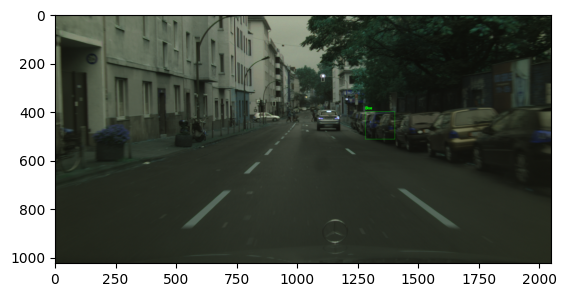

In [14]:
_, _, x0, x1, y0, y1, img_path = croppedImagesDetails.iloc[0, :]
img = cv.imread(img_path)
cv.rectangle(img, (x0, y0), (x1, y1), (0, 255, 0), 1)  # Draw green rectangle
cv.putText(img, "Box", (x0, y0 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Add label

plt.imshow(img)


In [15]:
from tqdm import tqdm

In [16]:
class transformImages:
    def __init__(self, df):
        self.df = df

    def cutImage(self):
        cutImages = []
        total_images = len(self.df['Image'])

        # Initialize the tqdm progress bar
        with tqdm(total=total_images, desc="Cutting Images") as pbar:
            for p in range(total_images):
                imgPath = self.df['Path'][p]
                imgGraypath = cv.imread(imgPath)
                imgGray = cv.cvtColor(imgGraypath, cv.COLOR_BGR2GRAY)
                cut_img = imgGray[self.df['ymin'][p]:self.df['ymax'][p],self.df['xmin'][p]:self.df['xmax'][p]]
                cutImages.append(cut_img)

                # Update the progress bar
                pbar.update(1)
        return cutImages

    def getHoG(self, cutImages):
        hogImages = []
        total_images = len(self.df['Image'])
        with tqdm(total=total_images, desc="HoG Transfor") as pbar:
            for cut_img in cutImages:
                fd, hog_image = hog(cut_img, orientations=9, pixels_per_cell=(2, 2),
                            cells_per_block=(2, 2), visualize=True)#, multichannel=True)
            #maththew what is fd here, we dont need that?
                hogImages.append(hog_image)
                pbar.update(1)
        return hogImages

    def getSIFT(self, cutImages):
        siftImages = []
        for cut_img in cutImages:
            sift = cv.SIFT_create()
            # maththew what is the best approch, apply sift before croppig or after cropping?
            keypoints = sift.detect(cut_img,None)
            siftImage = cv.drawKeypoints(cut_img,keypoints,imgGray,color = (0, 255, 0))
            siftImages.append(siftImage)
        return siftImages


    #resize the images
    def resizeImg(self, cutImages, size):
        resizedImg = []
        min_height = float('inf')
        min_width = float('inf')

        for img in cutImages:
            height, width = img.shape[:2]  # Get the height and width of the image
            min_height = size #min(min_height, height)
            min_width = size #min(min_width, width)

        with tqdm(total=len(cutImages), desc="Resizing Images") as pbar:
            for img in cutImages:
                img_resized = cv.resize(img, (min_width, min_height))
                resizedImg.append(img_resized)
                pbar.update(1)

        return resizedImg

In [17]:
trPedestran = transformImages(croppedImagesDetails)
cutImages = trPedestran.cutImage()
resizedImages = trPedestran.resizeImg(cutImages=cutImages, size=82)
hogImages = trPedestran.getHoG(cutImages=resizedImages)
siftImages = trPedestran.getSIFT(cutImages=resizedImages)


HoG Transfor: 100%|██████████| 4005/4005 [18:36<00:00,  3.59it/s]


(82, 82)

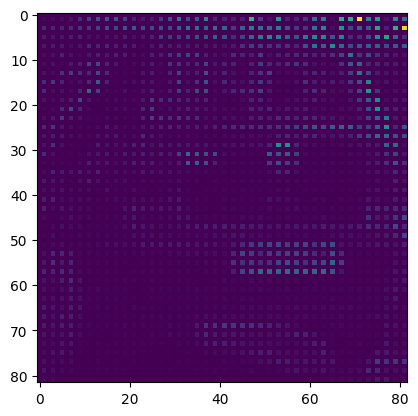

In [18]:
plt.imshow(hogImages[18])
hogImages[18].shape

In [19]:
import numpy as np


concatenated_images = []

# Iterate through the images and concatenate the first image from each set
for i in range(len(resizedImages)):
    # Concatenate the first images along the third axis to create a 3D array
    concatenated_image = np.stack((resizedImages[i], hogImages[i], siftImages[i][:,:,0]), axis=-1)
    concatenated_images.append(concatenated_image)

# Convert the list of concatenated images to a numpy array
concatenated_images_array = np.array(concatenated_images)

# Print the shape of the concatenated images array
print(concatenated_images_array.shape)

(4005, 82, 82, 3)


PCA

In [20]:
import numpy as np

concatenated_images_array = np.array(concatenated_images_array)
concatenated_images_array.shape

(4005, 82, 82, 3)

In [ ]:
from sklearn.decomposition import PCA
# Flatten the images
n_samples, h, w, c = concatenated_images_array.shape
data = concatenated_images_array.reshape((n_samples, -1))

# Standardize the data
data_std = (data - data.mean()) / data.std()

# Define PCA with desired number of components for dimensionality reduction
n_components = 40  # Reducing to 2 components for visualization
pca = PCA(n_components=n_components)

# Fit PCA and transform the data
data_pca = pca.fit_transform(data_std)

# Plot original and dimensionality-reduced images
plt.figure(figsize=(10, 4))
for i in range(10):  # Plotting first 10 images for demonstration
    # plt.subplot(2, 10, i + 1)
    # plt.imshow(concatenated_images_array[i], cmap=plt.cm.gray)
    # plt.title('Original')

    #plt.subplot(2, 10, i + 11)
    reduced_img = pca.inverse_transform(data_pca[i]).reshape((h, w, 3))  # Reshape to original shape
    #plt.imshow(reduced_img, cmap=plt.cm.gray)
    #plt.title('Reduced')

#plt.tight_layout()
#plt.show()


In [ ]:
dataset = pd.DataFrame(data_pca)
dataset['Lables'] = croppedImagesDetails['Label']
dataset

In [ ]:
#Save your dataset
csv_file = 'dataset.csv'
dataset.to_csv(csv_file, index=True)

Learning Algorithm

Here, I used the support vector machine algorithm with linear kernal, feel free to use any other classifcation algorithm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Assuming your DataFrame is named 'df'
X = dataset.drop('Lables', axis=1)  # Replace 'label_column_name' with the actual name of your label column
y = dataset['Lables']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
testing_error = 1 - accuracy_score(y_test, y_pred)
print("Testing Error:", testing_error)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ConReg ALgorithm - PCA Alternative

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Enable eager execution
tf.config.experimental_run_functions_eagerly(True)


# Load the dataset
X = concatenated_images_array
y = croppedImagesDetails['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Define 3 convolutional kernels
kernel_size = 4         #(T&E) This is a hyperparameter to the model and you can experiement with differnet values, different kernal sizes lie 3, 4, 5, 6, 7, 8, 9, 10 etc.
random_tensor = tf.random.normal([kernel_size, kernel_size, 3, 1])
random_tensor_float64 = tf.cast(random_tensor, dtype=tf.float64)
kernel = tf.Variable(random_tensor_float64)

# Initialize SVM classifier
# T&E -  change the kenal type
svm_model = SVC(kernel='linear')

# Create an optimizer
optimizer = tf.keras.optimizers.Adam()

batch_size = 32
# Define a custom training loop to update kernel weights based on SVM loss
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        tape.watch(kernel)
        # Perform convolution with the kernel
        images = tf.reshape(images, [batch_size, 125, 30, 3])
        convolved = tf.nn.conv2d(images, kernel, strides=[1, 1, 1, 1], padding='VALID')

        # Flatten the convolved tensor
        flattened = tf.reshape(convolved, [batch_size, -1])
        #flattened = tf.reshape(convolved, [-1, 5, 5])
        #flattened = flattened.numpy()
        # Train the SVM model
        #svm_model.fit(flattened.numpy(), labels.numpy())
        predictions = flattened[:, 0]
        #predictions = svm_model.predict(flattened)
        labels = tf.cast(labels, dtype=tf.int32)
        predictions = tf.cast(predictions, dtype=tf.float32)
        svm_loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(labels, predictions))


    # Update the kernel weights based on SVM loss
    gradients = tape.gradient(svm_loss, kernel)
    print(gradients)
    optimizer.apply_gradients([(gradients, kernel)])
    return svm_loss


# Convert to TensorFlow dataset for batching
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.batch(batch_size)

# Train the model for a few epochs
epochs = 1
accuracy = 0
for epoch in range(epochs):
    print(f"Epoch {epoch}......................Accuracy:{1 - accuracy}%")
    for batch_images, batch_labels in train_dataset:
        # Expand dimensions to add batch dimension
        batch_images = tf.expand_dims(batch_images, axis=-1)
        # Call train_step for each batch
        train_step(batch_images, batch_labels)




In [ ]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Enable eager execution
tf.config.experimental_run_functions_eagerly(True)


# Load the dataset
X = concatenated_images_array
y = croppedImagesDetails['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Define 3 convolutional kernels
kernel_size = 4         #(T&E) This is a hyperparameter to the model and you can experiement with differnet values, different kernal sizes lie 3, 4, 5, 6, 7, 8, 9, 10 etc.
random_tensor = tf.random.normal([kernel_size, kernel_size, 3, 1])
random_tensor_float64 = tf.cast(random_tensor, dtype=tf.float64)
kernel = tf.Variable(random_tensor_float64)

# Initialize SVM classifier
# T&E -  change the kenal type
svm_model = SVC(kernel='linear')

# Create an optimizer
optimizer = tf.keras.optimizers.Adam()

batch_size = 32
# Define a custom training loop to update kernel weights based on SVM loss
# @tf.function
# def train_step(images, labels):
#     with tf.GradientTape() as tape:
#         tape.watch(kernel)
#         # Perform convolution with the kernel



#     # Update the kernel weights based on SVM loss
#     gradients = tape.gradient(svm_loss, kernel)
#     print(gradients)
#     optimizer.apply_gradients([(gradients, kernel)])
#     return svm_loss


# Convert to TensorFlow dataset for batching
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.batch(batch_size)

# Train the model for a few epochs
epochs = 1
accuracy = 0
for epoch in range(epochs):
    print(f"Epoch {epoch}......................Accuracy:{accuracy}%")
    for batch_images, batch_labels in train_dataset:
        # Expand dimensions to add batch dimension
        batch_images = tf.expand_dims(batch_images, axis=-1)
        # Call train_step for each batch
        images = tf.reshape(batch_images, [batch_size, 125, 30, 3])
        convolved = tf.nn.conv2d(images, kernel, strides=[1, 1, 1, 1], padding='VALID')

        # Flatten the convolved tensor
        flattened = tf.reshape(convolved, [batch_size, -1])

        # Train the SVM model
        svm_model.fit(flattened.numpy(), batch_labels.numpy())

        predictions = svm_model.predict(flattened)
        accuracy = accuracy_score(batch_labels, predictions)

        svm_output = np.expand_dims(predictions, axis=1)  # Make it a column vector
        gradient = -2 * np.dot(flattened.numpy().T, (batch_labels.numpy().reshape((-1, 1)) * svm_output))*(1-accuracy)

        # Update the weight matrix using the gradients and a learning rate
        learning_rate = 0.01
        #kernel -= learning_rate * gradient
        kernel.assign_sub(learning_rate * gradient)

        # Optionally, you can normalize the weight matrix to keep it stable
        kernel_norm = np.linalg.norm(kernel, axis=(1, 2), keepdims=True)
        kernel = kernel / kernel_norm






In [ ]:
import numpy as np

# Define the input x and weight w
x = np.random.randn(10, 10)
w = np.random.randn(3, 3)

# Initialize the partial derivative of y with respect to w
dy_dw = np.zeros_like(w)

# Compute the partial derivative using nested loops
for i in range(8):  # Loop over rows of x
    for j in range(8):  # Loop over columns of x
        # Sum over the positions where x and w overlap
        for p in range(3):  # Loop over rows of w
            for q in range(3):  # Loop over columns of w
                dy_dw[p, q] += x[i+p, j+q]

print("Partial derivative dy/dw:")
print(dy_dw)

In [ ]:
random_tensor_float64 = tf.cast(random_tensor, dtype=tf.float64)
kernel2 = tf.Variable(random_tensor_float64)
X_test = tf.reshape(X_test, [X_test.shape[0], 8, 8, 1])
convolved = tf.nn.conv2d(X_test, kernel2, strides=[1, 1, 1, 1], padding='VALID')
# Flatten the convolved feature map
flattened = tf.reshape(convolved, [-1, 6, 6])
# Train the SVM model
predictions = svm_model(flattened)
predicted_labels = tf.argmax(predictions, axis=1).numpy()
#predictions = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy on test set: {accuracy}")

In [ ]:
kernel

In [ ]:
# Evaluate the model on the test set
X_test = tf.reshape(X_test, [X_test.shape[0], 125, 30, 3])
convolved = tf.nn.conv2d(X_test, kernel, strides=[1, 1, 1, 1], padding='VALID')
# Flatten the convolved feature map
flattened = tf.reshape(convolved, [-1, 5, 5])
# Train the SVM model
predictions = svm_model(flattened)
predicted_labels = tf.argmax(predictions, axis=1).numpy()
#predictions = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy on test set: {accuracy}")